# Testowanie algorytmów PCA i t-SNE na danych z guza raka piersi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.datasets import load_breast_cancer
from pca import pca
from yellowbrick.features.pca import PCADecomposition

## Wczytanie danych i eksploracja

In [2]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [19]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [3]:
print("\nBrakujące wartości:")
print(df.isnull().sum())


Brakujące wartości:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [4]:
print("\nStatystyki opisowe:")
df.describe()


Statystyki opisowe:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


## Standaryzacja danych

### Użyj StandardScaler() do standaryzacji danych.

In [5]:
features = data.feature_names
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

## Macierz korelacji

### Zbuduj macierz korelacji (.corr()), zwizualizować możesz jako heatmapa z seaborna (sns.heatmap()).

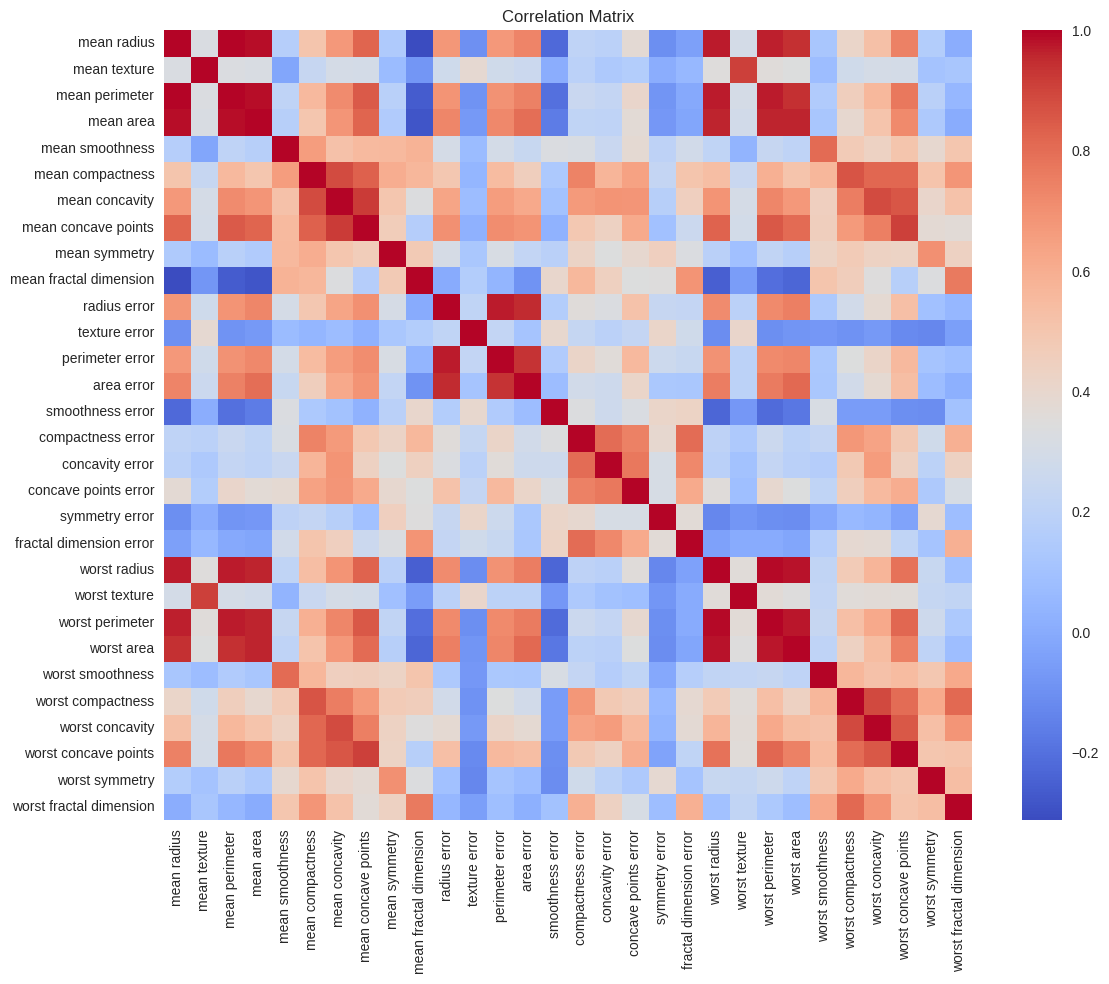

In [6]:
plt.figure(figsize=(12,10))
sns.heatmap(df[features].corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

## PCA

In [7]:
pca_model = PCA()
X_pca = pca_model.fit_transform(X_scaled)

### Zrób wykres osypiska (oś x- składowe główne, oś y- wartość własna, tip: eigenvalues = pca_model.explained_variance_).

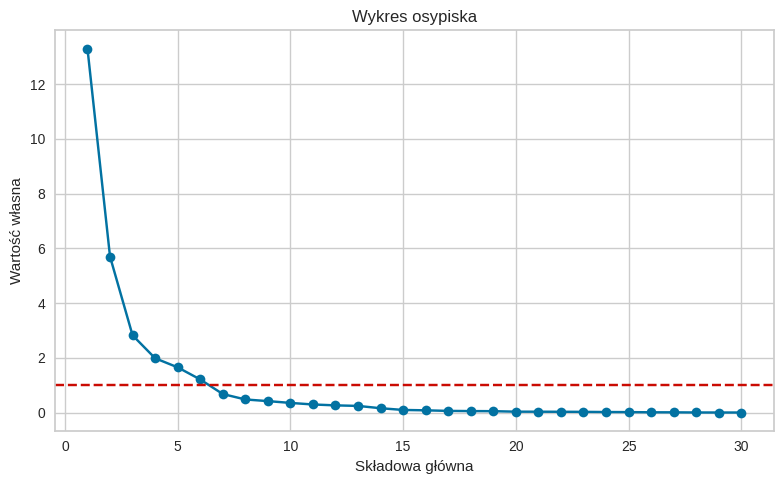

In [8]:
plt.figure(figsize=(8,5))
eigenvalues = pca_model.explained_variance_
plt.plot(range(1, len(eigenvalues)+1), eigenvalues, marker='o', linestyle='-')
plt.axhline(y=1, color='r', linestyle='--')  # linia Kaisera
plt.xlabel('Składowa główna')
plt.ylabel('Wartość własna')
plt.title('Wykres osypiska')
plt.grid(True)
plt.tight_layout()
plt.show()

### Oblicz ile potrzeba składowych według kryterium Kaisera (wartość własna > 1). Możesz dodatkowo dodać jako linię na wykresie osypiska.

In [9]:
print("\nEigenvalues:")
print(eigenvalues)
kaiser_components = np.sum(eigenvalues > 1)
print(f"\nIlośc główych składowych według Kaisera: {kaiser_components}")


Eigenvalues:
[1.33049908e+01 5.70137460e+00 2.82291016e+00 1.98412752e+00
 1.65163324e+00 1.20948224e+00 6.76408882e-01 4.77456255e-01
 4.17628782e-01 3.51310875e-01 2.94433153e-01 2.61621161e-01
 2.41782421e-01 1.57286149e-01 9.43006956e-02 8.00034045e-02
 5.95036135e-02 5.27114222e-02 4.95647002e-02 3.12142606e-02
 3.00256631e-02 2.74877113e-02 2.43836914e-02 1.80867940e-02
 1.55085271e-02 8.19203712e-03 6.91261258e-03 1.59213600e-03
 7.50121413e-04 1.33279057e-04]

Ilośc główych składowych według Kaisera: 6


### Oblicz ile potrzeba głównych składowych według kryterium minimalnego zasobu wyjaśnianej zmienności (>70%).

In [10]:
threshold = 0.70
components_threshold = np.argmax(np.cumsum(pca_model.explained_variance_ratio_) >= threshold) + 1
print(f"\nNumber of components to explain {threshold*100}% variance: {components_threshold}")


Number of components to explain 70.0% variance: 3


## Wizualizacja

### Zwizualizuj dane w przestrzeni składowych głównych oraz jako biplot.

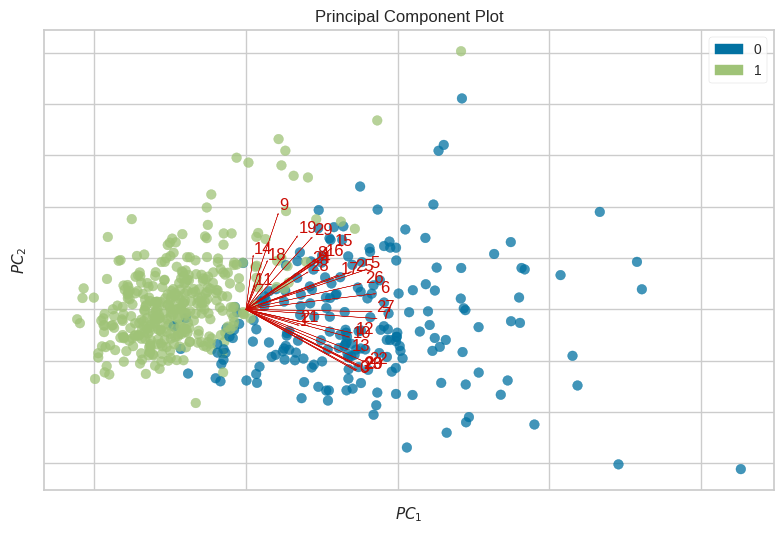

<Axes: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [11]:
visualizer = PCADecomposition(scale=True, proj_features=True, biplot=True)
visualizer.fit_transform(X_scaled, df['target'])
visualizer.show()

## Podejście alternatywne

### Zastosujmy bibliotekę pca

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [30] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[6]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


[scatterd] >INFO> Create scatterplot


[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


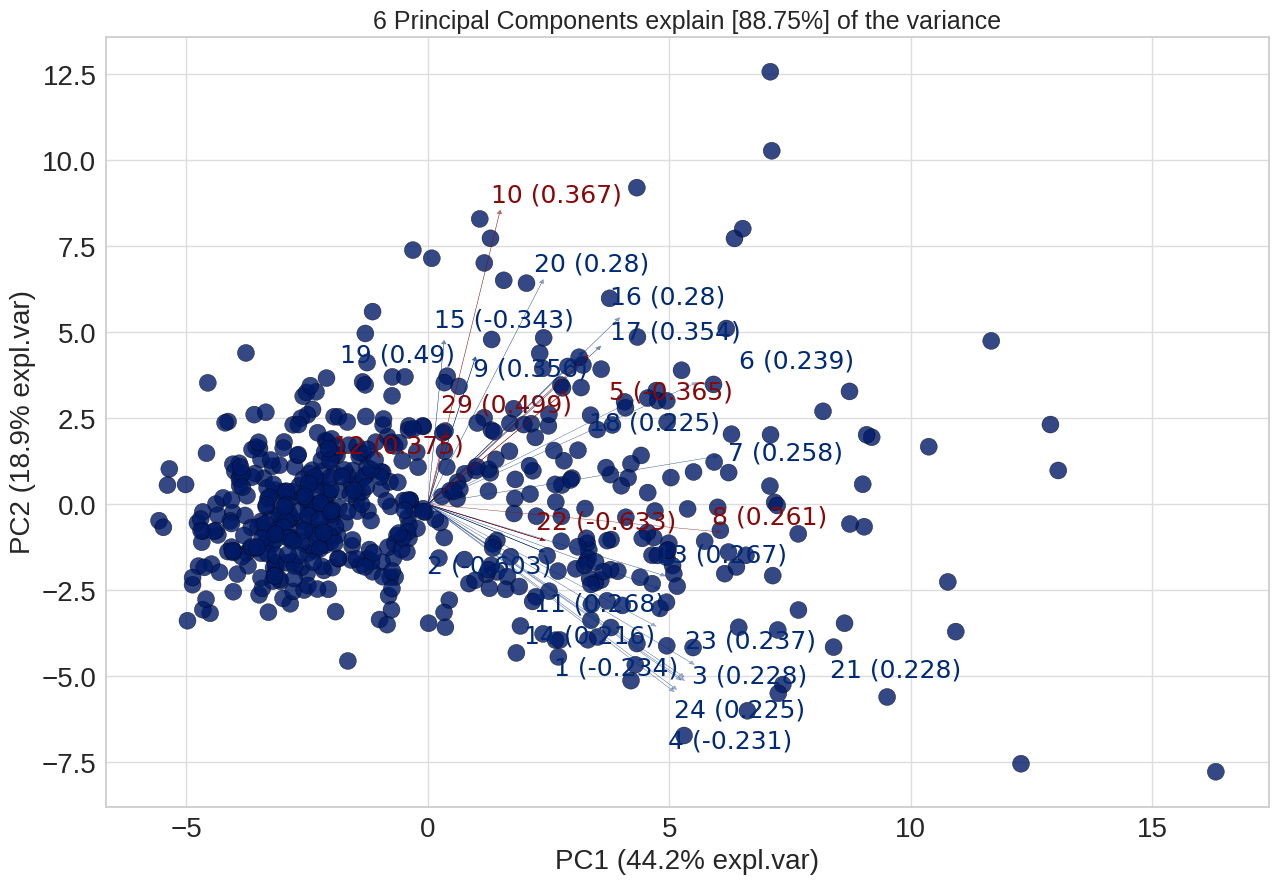

In [12]:
model = pca(n_components=6, normalize=True)
out = model.fit_transform(X_scaled)
fig, ax = model.biplot(label=True, legend=False, figsize=(15, 10))
plt.show()

#### PCA() ze scikit-learn to klasyczna, „goła” wersja – trzeba samemu przeskalować dane i przygotować wykresy, ale daje dużą kontrolę i dobrze się sprawdza, gdy robisz coś bardziej technicznego albo budujesz modele. pca() z biblioteki pca jest prostsza w użyciu – sama skaluje dane (jeśli chcesz), zwraca wszystko w ładnych tabelkach i ma gotowe funkcje do biplotów czy scree plotów. Świetna na szybki przegląd danych i prezentacje, ale mniej elastyczna, gdy potrzebujesz większej kontroli.

## t-SNE

In [13]:
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

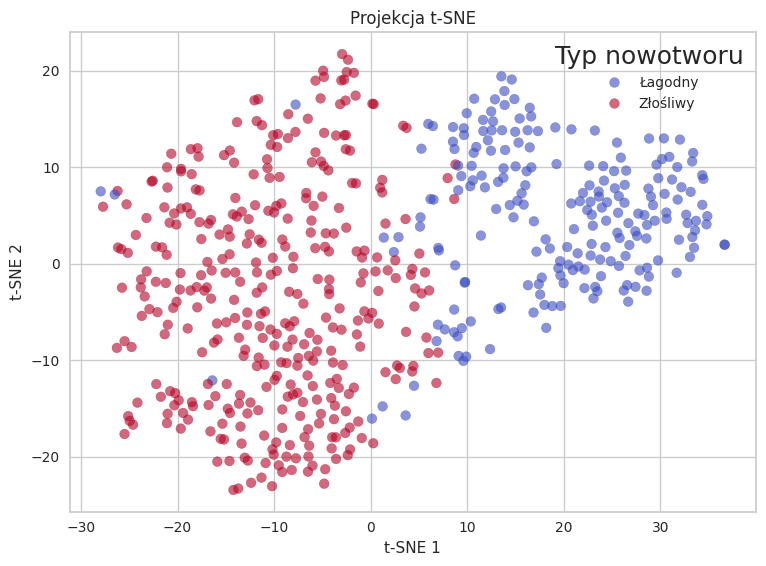

In [14]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_tsne[:,0], X_tsne[:,1], c=df['target'], cmap='coolwarm', alpha=0.6)
handles, _ = scatter.legend_elements()
labels = ['Łagodny', 'Złośliwy']
plt.legend(handles, labels, title='Typ nowotworu')
plt.title('Projekcja t-SNE')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.tight_layout()
plt.show()

### Spróbuj innych konfiguracji parametrów, co się dzieje?

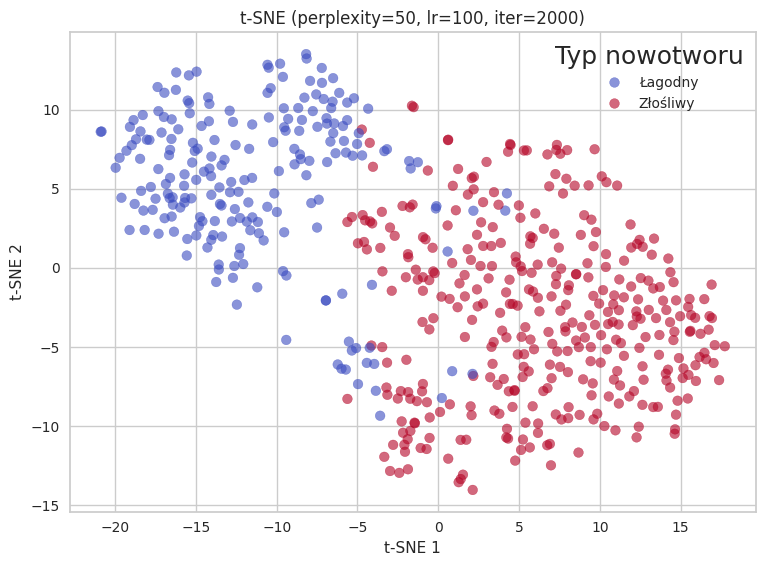

In [15]:
tsne_2 = TSNE(n_components=2, perplexity=50, learning_rate=100, n_iter=2000, random_state=42)
X_tsne2 = tsne_2.fit_transform(X_scaled)


plt.figure(figsize=(8,6))
scatter=plt.scatter(X_tsne2[:,0], X_tsne2[:,1], c=df['target'], cmap='coolwarm', alpha=0.6)
handles, _ = scatter.legend_elements()
labels = ['Łagodny', 'Złośliwy']
plt.legend(handles, labels, title='Typ nowotworu')
plt.title('t-SNE (perplexity=50, lr=100, iter=2000)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.tight_layout()
plt.show()

### Zapisanie danych po dokonanych transformacjach

In [18]:
# Zapis PCA (6 składowych)
np.savetxt("pca.csv", X_pca[:, :6], delimiter=",")

# Zapis t-SNE
np.savetxt("tsne.csv", X_tsne2, delimiter=",")